# InstaBot - Part 2

## Tasks

- > 1. Now your friend has followed a lot of different food bloggers, he needs to analyse the habits of these bloggers.
    <ol>
    <li>From the list of instagram handles you obtained when you searched ‘food’ in previous project. Open the first 10 handles and find the top 5 which have the highest number of followers</li>
    <li>Now Find the number of posts these handles have done in the previous 3 days.</li>
    <li>Depict this information using a suitable graph.</li>
    </ol>

- > 2. Your friend also needs a list of hashtags that he should use in his posts.
    <ol>
    <li>Open the 5 handles you obtained in the last question, and scrape the content of the first 10 posts of each handle.</li>
    <li>Prepare a list of all words used in all the scraped posts and calculate the frequency of each word.</li>
    <li>Create a csv file with two columns : the word and its frequency</li>
    <li>Now, find the hashtags that were most popular among these bloggers</li>
    <li>Plot a Pie Chart of the top 5 hashtags obtained and the number of times they were used by these bloggers in the scraped posts.</li>
    </ol>
- > 3. You need to also calculate average followers : likes ratio for the obtained handles.
    - Followers : Likes ratio is calculated as follows:
   <ol>
    <li> Find out the likes of the top 10 posts of the 5 handles obtained earlier.</li>
    <li>Calculate the average likes for a handle.</li>
    <li>Divide the average likes obtained from the number of followers of the handle to get the average followers:like ratio of each handle.</li>
    <li>Create a bar graph to depict the above obtained information.</li>
   <ol>

In [1]:
import time
from selenium import webdriver
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.common.by import By
from selenium.webdriver.support import expected_conditions as EC
from bs4 import BeautifulSoup
from selenium.common.exceptions import NoSuchElementException,StaleElementReferenceException

# 
import pandas as pd
import numpy as np 
from datetime import datetime
import matplotlib.pyplot as plt

##### Here i have used insatBot part 1 code as module and imported it to avoid repetetion of code implementation

In [2]:
## Necessary imports 
from automateInsta import AutomateInsta

In [3]:
## initializing the driver 
driver = webdriver.Chrome(executable_path='/Users/vamsi katam/chromedriver.exe')

In [4]:
# website which we need to use
url = 'https://www.instagram.com/'

In [5]:
autoInsta = AutomateInsta(driver)

In [6]:
autoInsta.open(url)

In [7]:
autoInsta.login('vamsi7dev','katam@dev@7')

Successfully Logged in


### Task 1

- >  Now your friend has followed a lot of different food bloggers, he needs to analyse the habits of these bloggers.
    - From the list of instagram handles you obtained when you searched ‘food’ in previous project. Open the first 10 handles and find the top 5 which have the highest number of followers
    - Now Find the number of posts these handles have done in the previous 3 days.
    - Depict this information using a suitable graph.

In [8]:
def get_followers_count(handle):
    url = 'https://www.instagram.com/{0}/'.format(handle)
    driver.get(url)
    time.sleep(3)
    count = driver.find_elements_by_class_name('g47SY ')[1].get_attribute('title')
    count = int(count.replace(',',""))
    return count

In [9]:
def get_post_count_days(handle,days):
    try:
        url = 'https://www.instagram.com/{0}/'.format(handle)
        # opening the profile page
        driver.get(url)
        time.sleep(2)
        driver.find_element_by_link_text('POSTS').click()

        # here we are opening a post 
        driver.find_element_by_xpath('//div[@class = "Nnq7C weEfm"]/div/a').click()
        # will go upto 30 posts 
        count = 0
        
        cur_date =pd.to_datetime(datetime.today()).day
        date_li = [cur_date-i for i in range(0,days+1)]
#         print(date_li)
        while True:
            wait = WebDriverWait(driver,10)
            element = wait.until(EC.presence_of_element_located((By.XPATH,'//div[@class = "k_Q0X I0_K8  NnvRN"]/a/time')))
            
            posted_time = pd.to_datetime(driver.find_element_by_xpath('//div[@class = "k_Q0X I0_K8  NnvRN"]/a/time').get_attribute('datetime'))
#             print(posted_time)
            pdat = posted_time.day
            if pdat in date_li:
                if pdat != cur_date:
                    count += 1
            else:
                break
            driver.find_element_by_css_selector('a.coreSpriteRightPaginationArrow').click()
            time.sleep(2)
        driver.get('https://www.instagram.com/')
    except Exception as e:
        print(e)
    finally:
        return count

In [10]:
def get_top_5_handles(keyword):
    
    handles = autoInsta.get_insta_handles(keyword)
    first_10_handles = handles[:10]
    
    handles_followers_count = {}
    for i in first_10_handles:
        count = get_followers_count(i)
        handles_followers_count[i] = handles_followers_count.get(i,count)
    
    # lets get top 5 handles with max follower
    top_5_handles = {}
    sorted_handles = sorted(handles_followers_count,key=handles_followers_count.get,reverse=True)
    for i in sorted_handles[:5]:
        top_5_handles[i] = top_5_handles.get(i,0)
    
    # updating the posts count for each handle
    for i in top_5_handles:
        posts_count = get_post_count_days(i,3)
        top_5_handles[i] = posts_count
    
    #storing the handles in sorted order 
    top_5_handles_posts_count = {}
    for i in sorted(top_5_handles,key=top_5_handles.get,reverse=True):
        top_5_handles_posts_count[i] = top_5_handles_posts_count.get(i,top_5_handles[i])
    
    return top_5_handles_posts_count

In [11]:
def plot_top_5_handles(top_5_handles):
    # plotting here 
    plt.figure(figsize=(10,7.5))
    x = list(top_5_handles.keys())
    y = list(top_5_handles.values())
    plt.bar(x,y,edgecolor='black')
    plt.xticks(rotation = 30)
    plt.axis([-1,5,0,5])
    for i,j in zip(x,y):
        plt.text(i,j+0.05,j,fontweight= 'bold',color='black',ha='center')
    plt.title('Top 5 Instagram Handle\'s last 3 days posts count',fontdict={'weight':'bold','size':12})
    plt.xlabel('Handle',fontdict={'weight':'bold','size':12})
    plt.ylabel('Posts Count',fontdict={'weight':'bold','size':12})
    plt.savefig(r"C:\Users\vamsi katam\Desktop\CN\Assignments\Project InstaBot Part-2\top_5_insta_hanldes_last_3_days_posts_count.png",dpi=150)
    plt.show()

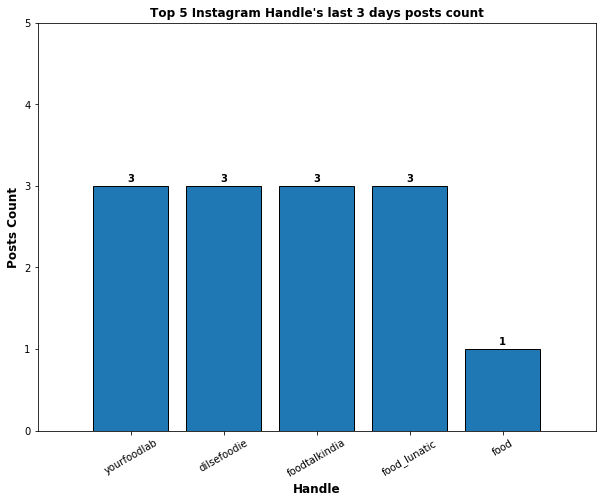

In [12]:
top_5_handles = get_top_5_handles('food')
plot_top_5_handles(top_5_handles)

#### Task 2
- > Your friend also needs a list of hashtags that he should use in his posts.
    - Open the 5 handles you obtained in the last question, and scrape the content of the first 10 posts of each handle.
    - Prepare a list of all words used in all the scraped posts and calculate the frequency of each word.
    - Create a csv file with two columns : the word and its frequency
    - Now, find the hashtags that were most popular among these bloggers
    - Plot a Pie Chart of the top 5 hashtags obtained and the number of times they were used by these bloggers in the scraped posts.


> 2.1 Open the 5 handles you obtained in the last question, and scrape the content of the first 10 posts of each handle

In [13]:
def get_hashtags(handle,posts_count):
    try:
        url = 'https://www.instagram.com/{0}/'.format(handle)
        # opening the profile page
        driver.get(url)
        time.sleep(2)
        driver.find_element_by_link_text('POSTS').click()

        # here we are opening a post 
        driver.find_element_by_xpath('//div[@class = "Nnq7C weEfm"]/div/a').click()
        # will go upto 30 posts 
        count = 0
        hashtags = []
        
        count = 0
        while count < posts_count:
            wait = WebDriverWait(driver,10)
            element = wait.until(EC.presence_of_element_located((By.XPATH,'//a[contains(@class,"xil3i")]')))
            
            hashtags_ele = driver.find_elements_by_xpath('//a[contains(@class,"xil3i")]')
            
            for ele in hashtags_ele:
                hashtags.append(ele.text)
                
            count += 1
            driver.find_element_by_css_selector('a.coreSpriteRightPaginationArrow').click()
        driver.get('https://www.instagram.com/')
    except e:
        print(e)
    finally:
        return hashtags

- > 2.2 Prepare a list of all words used in all the scraped posts and calculate the frequency of each word
- > 2.3 Create a csv file with two columns : the word and its frequency

In [14]:
def get_top_hashtags(top_5_handles):
    hashtags = []

    for i in top_5_handles.keys():
        handle_hashtags = get_hashtags(i,10)
        for tag in handle_hashtags:
            hashtags.append(tag)

    arr  = np.array(hashtags)

    sorted_hashtags = pd.Series(arr).value_counts().reset_index()
    sorted_hashtags.columns = ['Hashtag','Frequency']
    
    #2.1 saving the words and it frequency to csv file
    sorted_hashtags.to_csv('top_5_insta_handles_hashtags_freq.csv',index=False)
    
    return sorted_hashtags

In [15]:
hashtags = get_top_hashtags(top_5_handles)

> 2.4 Now, find the hashtags that were most popular among these bloggers

In [16]:
top_5_hashtags = hashtags.iloc[:5] # since we want top 5 hashtags 

> 2.5 Plot a Pie Chart of the top 5 hashtags obtained and the number of times they were used by these bloggers in the scraped posts

In [17]:
tags = top_5_hashtags.Hashtag
count = top_5_hashtags.Frequency

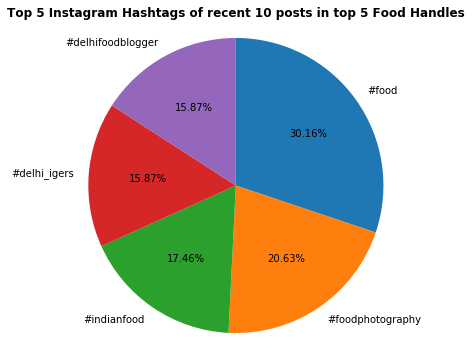

In [18]:
plt.figure(figsize=(8,6))
plt.pie(count,labels=tags,counterclock=False,startangle=90,autopct='%.2f%%')
plt.axis("equal")
plt.title('Top 5 Instagram Hashtags of recent 10 posts in top 5 Food Handles',fontdict={'weight':'bold','size':12})
plt.savefig(r"C:\Users\vamsi katam\Desktop\CN\Assignments\Project InstaBot Part-2\top_5_insta_hashtags_of_top_5_food_handles.png",dpi=150)
plt.show()

#### Task 3
- > 3. You need to also calculate average followers : likes ratio for the obtained handles.
    - Followers : Likes ratio is calculated as follows:
   <ol>
    <li> Find out the likes of the top 10 posts of the 5 handles obtained earlier.</li>
    <li>Calculate the average likes for a handle.</li>
    <li>Divide the average likes obtained from the number of followers of the handle to get the average followers:like ratio of each handle.</li>
    <li>Create a bar graph to depict the above obtained information.</li>
   <ol>

>3.1 Find out the likes of the top 10 posts of the 5 handles obtained earlier.

In [19]:
def get_post_likes():

    try :
        likes = driver.find_element_by_xpath('//a[@class = "zV_Nj"]/span').text
        likes = int(likes.replace(",",""))
    except NoSuchElementException:
        raise NoSuchElementException
    return likes 

In [20]:
def get_likes(handle,posts_count):
    
    try:
        url = 'https://www.instagram.com/{0}/'.format(handle)
        # opening the profile page
        driver.get(url)
        time.sleep(2)
        driver.find_element_by_link_text('POSTS').click()

        # here we are opening a post 
        driver.find_element_by_xpath('//div[@class = "Nnq7C weEfm"]/div/a').click()
        # will go upto 30 posts 
        count = 0
        posts_likes = []
        count = 0
        while count < posts_count:
            wait = WebDriverWait(driver,10)
            element = wait.until(EC.presence_of_element_located((By.XPATH,'//section[@class = "EDfFK ygqzn"]')))
            try:
                # getting likes of each post
                likes = get_post_likes()
                posts_likes.append(likes)
            except NoSuchElementException:
                driver.find_element_by_css_selector('a.coreSpriteRightPaginationArrow').click()
                continue
            count += 1
            driver.find_element_by_css_selector('a.coreSpriteRightPaginationArrow').click()
        driver.get('https://www.instagram.com/')
    except Exception as e:
        print(e)
    finally:
        return posts_likes

In [21]:
# scraping the likes of top 10 posts
handle_posts_likes = {}
for i in top_5_handles.keys():
    li = get_likes(i,10)
    handle_posts_likes[i] = handle_posts_likes.get(i,li)

> 3.2 Calculate the average likes for a handle.

In [22]:
# calculating the average of the likes
handle_posts_avg_likes = {}
for i in handle_posts_likes.keys():
    avg_likes = np.sum(handle_posts_likes[i])/10
    handle_posts_avg_likes[i] = handle_posts_avg_likes.get(i,avg_likes)

> 3.3 Divide the average likes obtained from the number of followers of the handle to get the average followers:like ratio of each handle.

In [23]:
# getting the followers count of top 5 handles 
handles_followers_count = {}
for i in top_5_handles.keys():
    cnt = get_followers_count(i)
    handles_followers_count[i] = handles_followers_count.get(i,cnt)

# calculating the ratio here 
handles_ratio = {}
for i,j in handle_posts_avg_likes.items():
#     print(j,handles_followers_count[i])
    handle_ratio = (j/handles_followers_count[i])
    handles_ratio[i] = handles_ratio.get(i,handle_ratio)

> 3.4 Create a bar graph to depict the above obtained information.

In [24]:
def plot_bar(x,y):
    plt.figure(figsize=(9,8))
    plt.bar(x,y,edgecolor = 'black',width=0.6)
    # plt.xticks(rotation=30)
    plt.axis([-1,5,0,0.025])
    for i,j in zip(x,y):
        plt.text(i,j+1e-4,round(j,3),fontweight= 'bold',color='black',ha='center')
    plt.title('Ratio of top 5 food handles',fontdict={'size':12})
    plt.xlabel('Handles',fontdict={'size':12})
    plt.ylabel('Ratio',fontdict={'size':12})
    plt.savefig(r"C:\Users\vamsi katam\Desktop\CN\Assignments\Project InstaBot Part-2\ratio_of_top_5_food_handles.png",dpi=150)
    plt.show()

In [25]:
x = handles_ratio.keys()
y = handles_ratio.values()

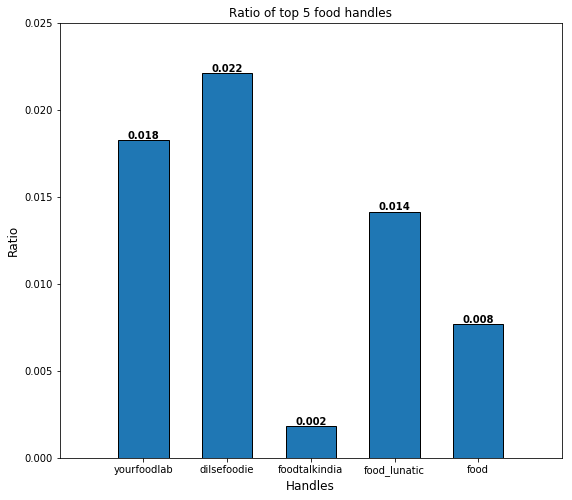

In [26]:
plot_bar(x,y)

#### Logging out from the Instagram

In [277]:
autoInsta.logout('vamsi7dev')

Succeffully Logged Out
